In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_theme()

In [ ]:
!unzip '/content/drive/MyDrive/Be Zen/test.zip'

Archive:  /content/drive/MyDrive/Be Zen/test.zip
   creating: test/
  inflating: test/2022_02_08-02_30_31_AM.csv  


In [ ]:
data = pd.read_csv("/content/test/2022_02_08-02_30_31_AM.csv", nrows=5)

In [ ]:
data.dtypes

uuid                 object
price_string         object
price_string_unf    float64
product_type         object
level_1              object
category             object
dtype: object

In [ ]:
dtypes = dict(zip(data.columns.values, ['object', 'object', 'object', 'object', 'object', 'object']))

In [ ]:
json.dumps(dtypes)

'{"uuid": "object", "price_string": "object", "price_string_unf": "object", "product_type": "object", "level_1": "object", "category": "object"}'

In [ ]:
del data

In [ ]:
data = pd.read_csv("/content/test/2022_02_08-02_30_31_AM.csv", dtype=dtypes)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   uuid              object
 1   price_string      object
 2   price_string_unf  object
 3   product_type      object
 4   level_1           object
 5   category          object
dtypes: object(6)
memory usage: 628.5+ MB


`Despite being the size of 1.3 GB, it is taking only 620+ MB memory, this way we can save ram and make the data loading process faster.`

## **EDA**

In [ ]:
data.shape

(13730000, 6)

In [ ]:
data.sample(5, random_state=2)

,uuid,price_string,price_string_unf,product_type,level_1,category
8249893,e6d3d9a3-e8ae-4921-9c10-72ad96a967dc,NaN,NaN,V29tZW5zIFRzaGlydHM,R3JhcGhpYyB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
722950,34777e55-adce-4de9-a212-cf902eec400b,$129,NaN,QmFja3BhY2s,QmFja3BhY2s,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
4611064,a4b61da4-a72b-418e-a20a-a330a2b451cb,NaN,NaN,d29tZW5zIFdhbGxldA,d29tZW5zIFdhbGxldA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
9021071,169a4873-42f2-42a0-b72b-4b14325c945d,$0.00,NaN,Q2hlZWsgbWFrZSB1cA,UGlnbWVudGVkIEJsdXNo,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
3300207,cd25aa8e-35db-475a-b5ef-16f34e7fe92e,NaN,NaN,RG9nIHRveXMgcGV0,RG9nIHRveXM,cGV0IHN1cHBsaWVz


In [ ]:
missing_values = pd.DataFrame({
    'missing_values':data.isnull().sum(),
    'percentage':data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
price_string_unf,13420000,97.742170
price_string,8220000,59.868900
level_1,50000,0.364166
product_type,10000,0.072833
category,10000,0.072833
uuid,0,0.000000


In [ ]:
plt.rcParams['figure.figsize'] = [25,10]

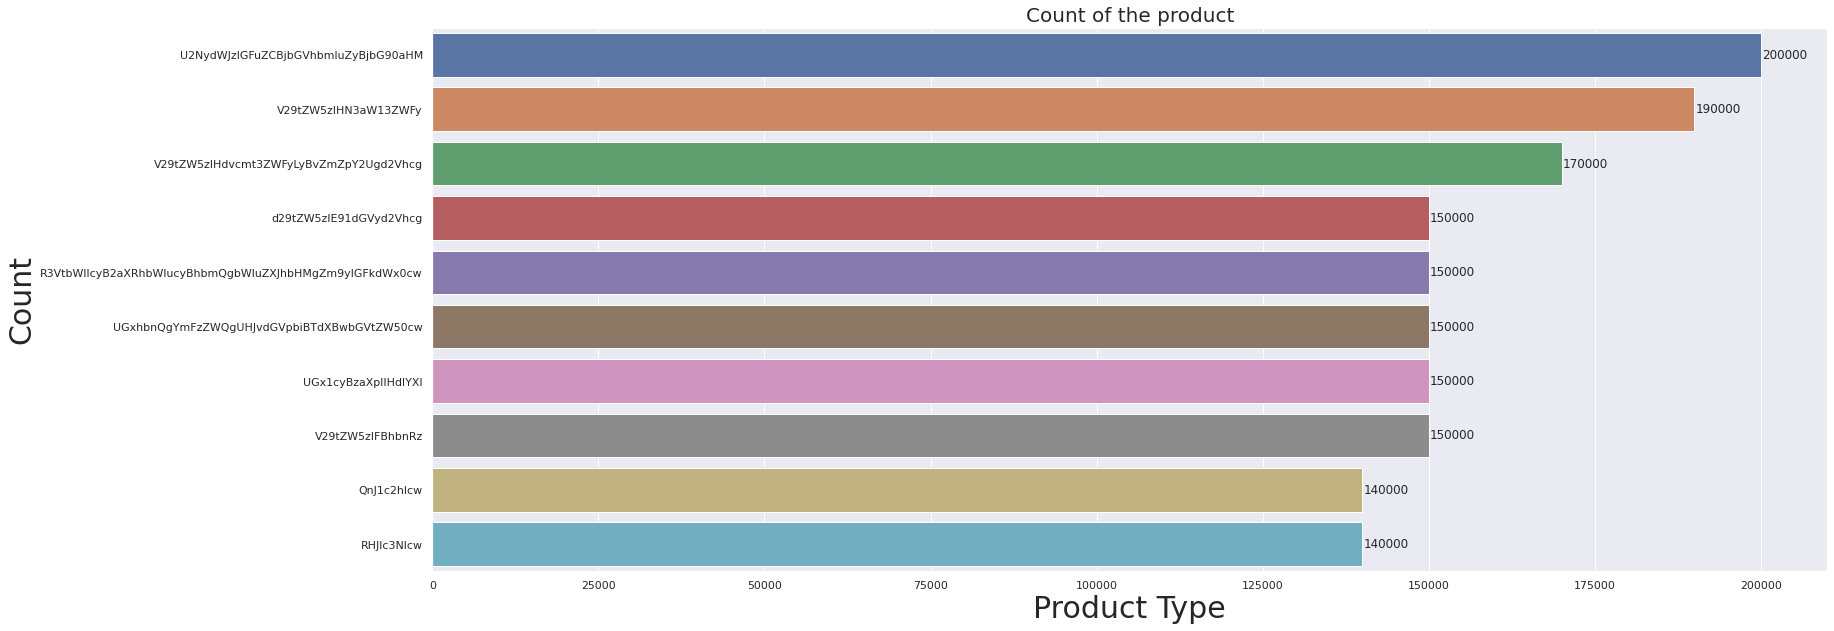

In [ ]:
ax = sns.countplot(y='product_type', data=data, order=data.product_type.value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0], padding=1)
plt.title('Count of the product', fontsize=20)
plt.xlabel('Product Type', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.show()

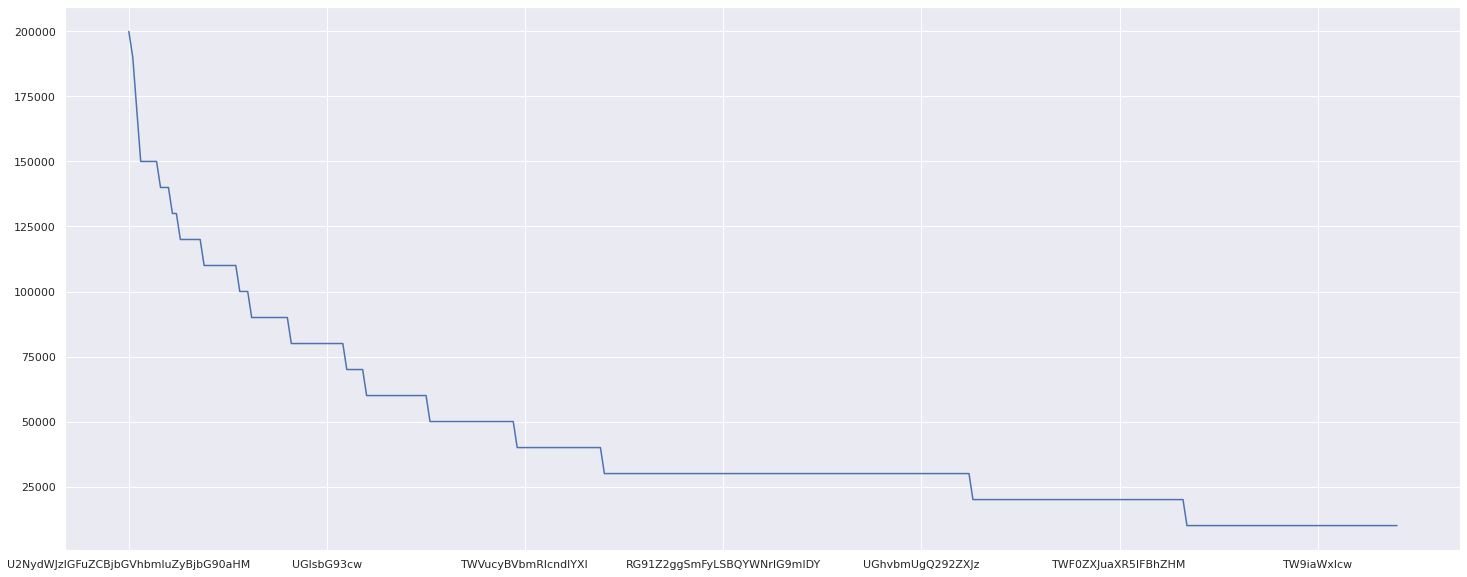

In [ ]:
data.product_type.value_counts().plot()
plt.show()

### **1. Products without prices**

In [ ]:
product_without_price =   data[data['price_string'].isnull()][['uuid', 'product_type', 'price_string']].reset_index(drop=True)
product_without_price

,uuid,product_type,price_string
0,638744a4-b0ae-4166-8cb6-5c063c862036,TGFwdG9wIENvdmVycy9CYWdz,NaN
1,ab313969-02cc-48b2-9daf-0054efb70b92,QmFraW5nIEN1cHMgYW5kIE1hdHM,NaN
2,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,NaN
3,1f2766ec-0a27-43f8-b28b-77a44492ead1,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,NaN
4,7bad39f5-74b9-4611-afb9-46fb135190cd,UGx1cyBzaXplIHdlYXIgZHJlc3M,NaN
...,...,...,...
8219995,8d763911-79b7-402d-8964-6bfe89692c66,TWVucyB3b3Jrd2Vhci8gb2ZmaWNlIHdlYXI,NaN
8219996,2dc182aa-d591-49e4-85d1-5c4a60a09664,U3BpY2Vz,NaN
8219997,2a13338e-9268-4f7b-9e7c-b8c41c72971b,RHJlc3Nlcw,NaN
8219998,679f073a-862a-4e43-b5ce-41e45afd3bfa,UGV0IEZvb2Q,NaN


There are in total `8220000` product that does not have price.

Following `product_type` have null values 

In [ ]:
X = pd.DataFrame({
    'count':product_without_price.value_counts('product_type'),
    'percentage':product_without_price.value_counts('product_type', normalize=True)*100
})

In [ ]:
X.reset_index()

,product_type,count,percentage
0,V29tZW5zIHN3aW13ZWFy,140000,1.705238
1,V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg,130000,1.583435
2,VG9kZGxlcnMvbmV3Ym9ybiBiYWJpZXM,130000,1.583435
3,UGx1cyBzaXplIHdlYXI,120000,1.461632
4,VmVoaWNsZSBUb3lz,120000,1.461632
...,...,...,...
273,U3RhaW4gYW5kIG9kb3IgZWxpbWluYXRvcg,10000,0.121803
274,U3BvcnRzIEJyYQ,10000,0.121803
275,U3BpY2Vz,10000,0.121803
276,RGVvZG9yYW50cyBmb3Igd29tZW4,10000,0.121803


There are total `278` product_type which have null values

### **2. Count of products without prices and with prices in each Product Type, Category, Level 1** 

`Count with Price`

In [ ]:
data.loc[data['price_string'].notnull()]['product_type'].value_counts()

U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM        140000
d29tZW5zIE91dGVyd2Vhcg                     130000
Q29va2luZyBVdGVuc2lscw                     110000
V29tZW5zIFBhbnRz                            90000
WW9nYSBBY2Nlc3Nvcmllcy8gR2Vhcg              90000
                                            ...  
TWVjaGFuaWNhbCBQZW5jaWxz                    10000
UGV0IHBvb3AgYmFncyB3aXRoIGRpc3BlbnNlcnM     10000
UnVncw                                      10000
SnVtcHN1aXRzL092ZXJhbGw                     10000
QmFieSBTb2Fw                                10000
Name: product_type, Length: 209, dtype: int64

In [ ]:
data.loc[data['price_string'].notnull()]['category'].value_counts()

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       1860000
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        750000
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          700000
Z3JvY2VyaWVz                            480000
a2l0Y2hpbmcgYW5kIGRpbmluZw              340000
SGVhbHRo                                290000
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     200000
VG95cyBhbmQgR2FtZXM                     190000
QXJ0IHN1cHBsaWVz                        190000
cGV0IHN1cHBsaWVz                        160000
b2ZmaWNlIHByb2R1Y3Rz                    150000
RWxlY3Ryb25pY3M                         110000
QmFieWNhcmU                              90000
Name: category, dtype: int64

In [ ]:
data.loc[data['price_string'].notnull()]['level_1'].value_counts()

U3Bvb24sIEtuaWZlIGFuZCBGb3Jr       60000
Q2xlYW5pbmcgY2xvdGg                50000
UHVmZmVyIEphY2tldA                 50000
TWVucyBTdHJhaWdodCBGaXQgamVhbnM    50000
U2NydWJz                           40000
                                   ...  
T25lIHBpZWNlIHN3aW1zdWl0           10000
RG9nIFdpcGVz                       10000
VHJhc2ggQmFncw                     10000
TWVucyBzbmVha2Vycw                 10000
UHVwcHkgU2hhbXBvbw                 10000
Name: level_1, Length: 366, dtype: int64

`Count without Price`

In [ ]:
data.loc[data['price_string'].isnull()]['product_type'].value_counts()

V29tZW5zIHN3aW13ZWFy                      140000
V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg    130000
VG9kZGxlcnMvbmV3Ym9ybiBiYWJpZXM           130000
VmVoaWNsZSBUb3lz                          120000
UGx1cyBzaXplIHdlYXI                       120000
                                           ...  
Um9sbGluZyBQaW4                            10000
V29ya291dCBMZWdnaW5ncw                     10000
TWVucyBKYWNrZXQ                            10000
U25lYWtlcnMgc2hvZXM                        10000
WW9nYSBNYXRz                               10000
Name: product_type, Length: 278, dtype: int64

In [ ]:
data.loc[data['price_string'].isnull()]['category'].value_counts()

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       2050000
Z3JvY2VyaWVz                           1130000
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          870000
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        720000
SGVhbHRo                                700000
VG95cyBhbmQgR2FtZXM                     600000
cGV0IHN1cHBsaWVz                        580000
QmFieWNhcmU                             570000
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     320000
a2l0Y2hpbmcgYW5kIGRpbmluZw              250000
RWxlY3Ryb25pY3M                         210000
QXJ0IHN1cHBsaWVz                        130000
b2ZmaWNlIHByb2R1Y3Rz                     80000
Name: category, dtype: int64

In [ ]:
data.loc[data['price_string'].isnull()]['level_1'].value_counts()

Rm9ybWFsIFN1aXRz                  60000
U3dlYXRzaGlydA                    60000
U29ja3M                           50000
Rm9ybWFsIFBhbnRz                  50000
TXVsdGl2aXRhbWluIGd1bW1pZXM       40000
                                  ...  
U29hcCBCYXI                       10000
RGlzaCBjbG90aA                    10000
UG90IHNjcnVicw                    10000
V29tZW5zIGJyaWVmcw                10000
RWNvIGZyaWVuZGx5IHlvZ2EgbWF0cw    10000
Name: level_1, Length: 476, dtype: int64

### **3. Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns.** 


In [ ]:
data['price_value'] = data['price_string'].map(lambda x : x.replace('$', '') if type(x) == str else x)
data['currency'] = data['price_string'].map(lambda x : '$' if type(x) == str else x)

In [ ]:
data['price_unf_value'] = data['price_string_unf'].map(lambda x : x.replace('$', '') if type(x) == str else x)

In [ ]:
data.drop(['price_string', 'price_string_unf'], axis=1, inplace=True)

In [ ]:
data.sample(5)

,uuid,product_type,level_1,category,price_value,currency,price_unf_value
1106144,975d54c7-dc37-4f55-b22c-81f6b4329238,U2NyZWVuIENvdmVycw,U2NyZWVuIENvdmVycw,RWxlY3Ryb25pY3M,43.96,$,NaN
2596061,2921c71a-250a-44a3-8d5e-fce2915750ca,UHVtcGtpbiBTZWVkcw,UHVtcGtpbiBTZWVkcw,Z3JvY2VyaWVz,NaN,NaN,NaN
5043542,8bace463-8a96-4063-b8f1-8acb820f5980,V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg,Rm9ybWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,148.00,$,NaN
11567266,c25765b1-5275-4f9a-bffb-abc3515cd809,VG9kZGxlcnMvbmV3Ym9ybiBiYWJpZXM,UGFudHMvU2hvcnRzIGZvciBiYWJ5,QmFieWNhcmU,NaN,NaN,NaN
10860345,33f297f5-1e8a-4b7b-802d-88696e40a716,Q3JvY2hldC9Lbml0dGluZw,S25pdHRpbmcgbmVlZGxlcw,QXJ0IHN1cHBsaWVz,NaN,NaN,NaN


### **4. List out the categories with average price of product.**

In [ ]:
data_ = data[data['price_value'].notnull()]

In [ ]:
data_.price_value = data_.price_value.astype('float32')

In [ ]:
data_.groupby('category')['price_value'].mean().sort_values(ascending=False)

category
QmFieWNhcmU                            163.688889
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       125.413872
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     82.223503
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          76.198997
RWxlY3Ryb25pY3M                         60.258183
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        34.745068
SGVhbHRo                                32.557587
VG95cyBhbmQgR2FtZXM                     32.448948
b2ZmaWNlIHByb2R1Y3Rz                    20.480000
QXJ0IHN1cHBsaWVz                        19.471052
a2l0Y2hpbmcgYW5kIGRpbmluZw              16.703236
cGV0IHN1cHBsaWVz                        14.181875
Z3JvY2VyaWVz                            10.541667
Name: price_value, dtype: float32